In [1]:
import utils
import dataloader

In [2]:
from PIL import Image

In [9]:
from torchvision import transforms

In [18]:
from models import builder

In [37]:
import matplotlib.pyplot as plt

In [5]:
image_path = "/Users/babanyyaz/Documents/Projects/python/autoencoder/dataset/101_ObjectCategories/gerenuk/image_0033.jpg"

In [7]:
image = Image.open(image_path).convert("RGB") 

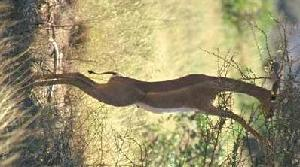

In [8]:
image

In [10]:
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match the input size of the autoencoder
    transforms.ToTensor(),          # Convert to tensor with values in [0, 1]
])

In [11]:
input_tensor = preprocess(image)  # Shape: (C, H, W)
input_tensor = input_tensor.unsqueeze(0)

In [13]:
input_tensor.shape

torch.Size([1, 3, 224, 224])

In [15]:
input_tensor.element_size(), input_tensor.nelement()

(4, 150528)

In [19]:
model = builder.BuildAutoEncoder("simple")

In [20]:
model_path = "/Users/babanyyaz/Documents/Projects/python/autoencoder/results/008.pth"

In [21]:
utils.load_dict(model_path, model)

SimpleAutoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(16, 3, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (5): Sigmoid()
  )
)

In [25]:
latent_space = model.encode(input_tensor)

In [27]:
latent_space.shape

torch.Size([1, 64, 28, 28])

In [28]:
decoded = model.decode(latent_space)

In [39]:
decoded.shape

torch.Size([1, 3, 224, 224])

In [34]:
dec_image = decoded.squeeze().detach()

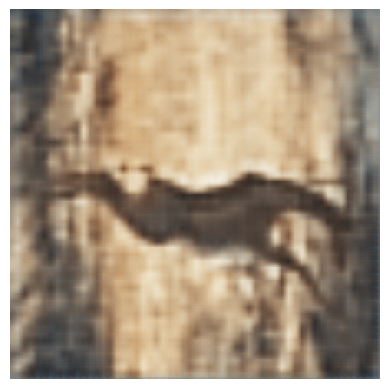

In [38]:
img = dec_image.permute(1, 2, 0).clamp(0, 1).numpy()

# Display the image
plt.imshow(img)
plt.axis("off")
plt.show()

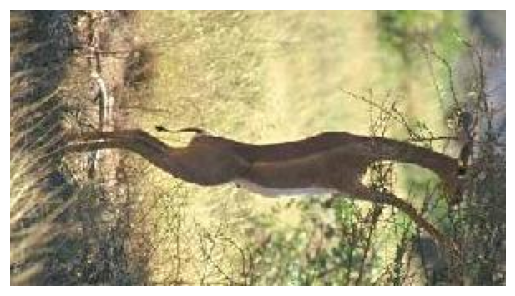

In [40]:
plt.imshow(image)
plt.axis("off")
plt.show()

In [42]:
img.shape

(224, 224, 3)